## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\users\bhuwa\appdata\local\programs\python\python36\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 85s 1s/step - loss: 2.3578 - accuracy: 0.7381 - val_loss: 0.3436 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 72s 1s/step - loss: 0.7060 - accuracy: 0.8816 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 69s 1s/step - loss: 0.6921 - accuracy: 0.8995 - val_loss: 0.7782 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 69s 1s/step - loss: 0.5637 - accuracy: 0.9139 - val_loss: 0.0643 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 72s 1s/step - loss: 0.4015 - accuracy: 0.9390 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 69s 1s/step - loss: 0.3966 - accuracy: 0.9385 - val_loss: 0.0982 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 70s 1s/step - loss: 0.5310 - accuracy: 0.9272 - val_loss: 0.2525 - val_accuracy: 0.9444
Epoch 8/20
61/61 [==

In [17]:
import matplotlib.pyplot as plt

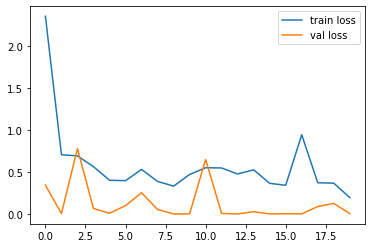

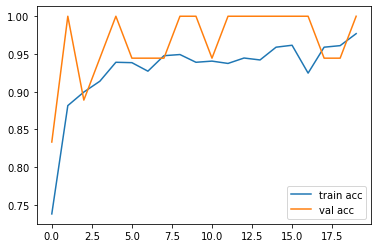

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [20]:

y_pred = model.predict(test_set)


In [21]:
y_pred

array([[0.00000000e+00, 7.57681131e-02, 6.67326691e-38, 9.24231946e-01],
       [4.40129441e-31, 0.00000000e+00, 1.00000000e+00, 1.26943852e-38],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.60596152e-31],
       [4.38487072e-24, 8.29765537e-14, 1.00000000e+00, 4.06520247e-27],
       [3.21446254e-29, 6.40486958e-13, 1.05619815e-08, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 6.01580642e-25, 4.76959744e-18],
       [1.08016421e-17, 5.53631507e-25, 1.00000000e+00, 4.76086508e-21],
       [1.28500827e-33, 1.00000000e+00, 9.23038826e-20, 6.82950489e-17],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.63380238e-15, 6.78245095e-04, 3.51124300e-16, 9.99321818e-01],
       [4.86358610e-29, 8.36848812e-08, 8.95476780e-19, 9.99999881e-01],
       [0.00000000e+00, 4.97944380e-26, 7.40600306e-26, 1.00000000e+00],
       [1.34242854e-28, 4.53599417e-20, 1.00000000e+00, 1.45270640e-15],
       [1.00000000e+00, 5.69756603e-24, 1.80190425e

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([3, 2, 1, 2, 3, 1, 2, 1, 1, 3, 3, 3, 2, 0, 2, 0, 0, 1], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_inception.h5')

In [36]:
img_data

NameError: name 'img_data' is not defined

In [29]:
img=image.load_img('Datasets/val/diseased cotton plant/dd (10)_iaip.jpg',target_size=(224,224))



In [30]:
x=image.img_to_array(img)
x

array([[[168., 154., 128.],
        [152., 138., 112.],
        [140., 126., 100.],
        ...,
        [ 74.,  68.,  54.],
        [ 53.,  47.,  33.],
        [ 46.,  40.,  26.]],

       [[174., 160., 134.],
        [126., 112.,  86.],
        [133., 119.,  93.],
        ...,
        [ 61.,  55.,  41.],
        [ 63.,  57.,  43.],
        [ 54.,  48.,  34.]],

       [[134., 120.,  94.],
        [189., 175., 149.],
        [156., 142., 116.],
        ...,
        [ 62.,  56.,  42.],
        [ 61.,  55.,  41.],
        [ 61.,  55.,  41.]],

       ...,

       [[144., 129., 108.],
        [141., 126., 105.],
        [130., 115.,  94.],
        ...,
        [ 78.,  71.,  43.],
        [ 88.,  81.,  53.],
        [175., 168., 140.]],

       [[134., 119.,  98.],
        [169., 154., 133.],
        [157., 142., 121.],
        ...,
        [126., 119.,  91.],
        [115., 108.,  80.],
        [138., 131., 103.]],

       [[133., 118.,  97.],
        [107.,  92.,  71.],
        [137., 1

In [31]:
x.shape

(224, 224, 3)

In [32]:
x=x/255

In [33]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
model.predict(img_data)

array([[9.9584121e-01, 7.8643106e-06, 1.6520705e-04, 3.9856974e-03]],
      dtype=float32)

In [35]:
a=np.argmax(model.predict(img_data), axis=1)

In [36]:
a==1

array([False])

In [37]:
import tensorflow as tf

In [38]:
tf.__version__

'2.6.2'